In [ ]:
import pandas as pd

# Membaca file dataset berita ekonomi nasional
df = pd.read_csv("/content/Scaping Berita - Scraping (1).csv")

print("===== 5 Data Teratas =====")
print(df.head())

print("\n===== Informasi Dataset =====")
print(df.info())

print("\n===== Jumlah Missing Value Tiap Kolom =====")
print(df.isnull().sum())

print("\n===== Jumlah Data Duplikat =====")
print(df.duplicated().sum())


===== 5 Data Teratas =====
      Tanggal                                              Judul   Media  \
0  10/26/2024  Menakar Kondisi Ekonomi Indonesia 2025 di Bawa...  Kompas   
1  10/27/2024  Melihat Potensi Dampak Ekonomi Indonesia Gabun...  Kompas   
2   11/5/2024  Prabowo Panggil DEN Bahas Strategi Peningkatan...  Kompas   
3   11/6/2024  Tantangan dan Peluang RI Kejar Target Pertumbu...  Kompas   
4  11/10/2024  Indonesia dan China Teken Kerja Sama Blue Econ...  Kompas   

                Kategori                                               Link  \
0                Ekonomi  https://money.kompas.com/read/2024/10/26/20470...   
1  Ekonomi Internasional  https://www.kompas.com/tren/read/2024/10/27/20...   
2   Ekonomi Pemerintahan  https://nasional.kompas.com/read/2024/11/05/17...   
3       Ekonomi Nasional  https://money.kompas.com/read/2024/11/06/08410...   
4     Ekonomi Kerja Sama  https://money.kompas.com/read/2024/11/10/17000...   

                                Interpret

Tahap 2: Pembersihan Data (Light Text Preprocessing)

In [ ]:


import pandas as pd
import re

# Membaca dataset awal hasil scraping
df = pd.read_csv("/content/Scaping Berita - Scraping (1).csv")

print("===== INFORMASI DATASET AWAL =====")
print("Jumlah data awal:", len(df))
print("Jumlah missing value:", df['Interpretasi singkat'].isnull().sum())
print("Jumlah duplikasi:", df.duplicated(subset=['Interpretasi singkat']).sum())
print("\nContoh 3 data awal sebelum pembersihan:\n")
print(df['Interpretasi singkat'].head(3))


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s.,]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


# 1. Hapus missing value & duplikasi
df = df.dropna(subset=['Interpretasi singkat'])
df = df.drop_duplicates(subset=['Interpretasi singkat'])
df = df.reset_index(drop=True)

# 2. Bersihkan teks
df['Interpretasi singkat'] = df['Interpretasi singkat'].apply(clean_text)


print("\n===== INFORMASI SETELAH PEMBERSIHAN =====")
print("Jumlah data sesudah pembersihan:", len(df))
print("Jumlah missing value:", df['Interpretasi singkat'].isnull().sum())
print("Jumlah duplikasi:", df.duplicated(subset=['Interpretasi singkat']).sum())

print("\n===== 3 DATA TERATAS SETELAH PEMBERSIHAN =====")
print(df['Interpretasi singkat'].head(3))

output_path = "berita_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\n📁 Dataset hasil pembersihan disimpan ke: {output_path}")


===== INFORMASI DATASET AWAL =====
Jumlah data awal: 1003
Jumlah missing value: 62
Jumlah duplikasi: 61

Contoh 3 data awal sebelum pembersihan:

0    Berita membahas proyeksi ekonomi Indonesia di ...
1    Membahas dampak bergabungnya Indonesia ke BRIC...
2    Pemberitaan mengenai langkah koordinatif Prabo...
Name: Interpretasi singkat, dtype: object

===== INFORMASI SETELAH PEMBERSIHAN =====
Jumlah data sesudah pembersihan: 941
Jumlah missing value: 0
Jumlah duplikasi: 0

===== 3 DATA TERATAS SETELAH PEMBERSIHAN =====
0    berita membahas proyeksi ekonomi indonesia di ...
1    membahas dampak bergabungnya indonesia ke bric...
2    pemberitaan mengenai langkah koordinatif prabo...
Name: Interpretasi singkat, dtype: object

📁 Dataset hasil pembersihan disimpan ke: berita_cleaned.csv



# Tahap 3: Pelabelan Otomatis (Lexicon-Based Sentiment)

In [ ]:

import pandas as pd

# Membaca dataset hasil pembersihan
df = pd.read_csv("/content/berita_cleaned.csv")

# Menentukan nama kolom teks utama
text_col = 'Interpretasi singkat'

# Daftar kata positif dan negatif sederhana
kata_positif = ["naik", "tumbuh", "meningkat", "sukses", "baik", "stabil", "membaik", "pulih", "kuat", "positif"]
kata_negatif = ["turun", "krisis", "melemah", "buruk", "negatif", "defisit", "rugi", "masalah", "utang", "inflasi"]

# Fungsi untuk menentukan sentimen
def label_sentimen(teks):
    teks = str(teks).lower()
    skor = sum(k in teks for k in kata_positif) - sum(k in teks for k in kata_negatif)
    if skor > 0:
        return "positif"
    elif skor < 0:
        return "negatif"
    else:
        return "netral"

# Terapkan fungsi ke seluruh data
df["label"] = df[text_col].apply(label_sentimen)

# Simpan dataset hasil labeling
df.to_csv("/content/berita_prabowo_labeled.csv", index=False)

# Tampilkan 10 data pertama
print("===== Contoh 10 Data Setelah Labeling =====")
print(df[[text_col, "label"]].head(10))


===== Contoh 10 Data Setelah Labeling =====
                                Interpretasi singkat    label
0  berita membahas proyeksi ekonomi indonesia di ...  positif
1  membahas dampak bergabungnya indonesia ke bric...  positif
2  pemberitaan mengenai langkah koordinatif prabo...  positif
3  nada netral positif. membahas optimisme pemeri...  positif
4  fokus pada kerja sama internasional di bidang ...  positif
5  memberitakan capaian ekonomi digital indonesia...  positif
6  menyoroti kebijakan penghematan dan strategi e...  positif
7  menguraikan paket stimulus ekonomi pemerintah....  positif
8  membahas peningkatan indeks terorisme dan damp...   netral
9  pidato prabowo menekankan konsep ekonomi panca...  positif


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Membaca dataset yang sudah berlabel otomatis
df = pd.read_csv("berita_prabowo_labeled.csv")

# Membagi dataset menjadi train (80%) dan test (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

print("Jumlah data total:", len(df))
print("Data train:", len(train_df))
print("Data test:", len(test_df))

# Menyimpan hasil pembagian
train_df.to_csv("train_dataset.csv", index=False)
test_df.to_csv("test_dataset.csv", index=False)
print("\n📁 Dataset train dan test berhasil disimpan.")


Jumlah data total: 941
Data train: 752
Data test: 189

📁 Dataset train dan test berhasil disimpan.


# Tahap 5: Tokenisasi Menggunakan IndoBERT

In [ ]:


from transformers import AutoTokenizer
import pandas as pd

#  Membaca dataset hasil split
train_df = pd.read_csv("/content/train_dataset.csv")
test_df = pd.read_csv("/content/test_dataset.csv")

#  Inisialisasi tokenizer IndoBERT
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

#  Menampilkan contoh 5 data teratas sebelum tokenisasi
print("===== Contoh 5 Data Sebelum Tokenisasi =====")
print(train_df[['Interpretasi singkat', 'label']].head())

#  Melakukan tokenisasi pada kolom teks
train_encodings = tokenizer(
    train_df["Interpretasi singkat"].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)

test_encodings = tokenizer(
    test_df["Interpretasi singkat"].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)

#  Menampilkan hasil tokenisasi untuk 5 data pertama
print("\n===== Contoh Hasil Tokenisasi (5 Data Teratas) =====")
for i in range(5):
    text_asli = train_df["Interpretasi singkat"].iloc[i]
    tokens = tokenizer.tokenize(text_asli)
    print(f"Teks {i+1}: {text_asli}")
    print(f"Token: {tokens[:15]}...")
    print("-" * 100)

#  Menyimpan hasil tokenisasi (opsional)
import torch

torch.save(train_encodings, "/content/train_encodings.pt")
torch.save(test_encodings, "/content/test_encodings.pt")

print("\n📁 Hasil tokenisasi disimpan sebagai file tensor (.pt)")


===== Contoh 5 Data Sebelum Tokenisasi =====
                                Interpretasi singkat    label
0  positif, menampilkan optimisme dan keyakinan p...  positif
1   netral humoris, retorika ringan tapi optimistis.   netral
2  berita membahas alasan di balik rencana revisi...   netral
3  nada positif, menunjukkan kolaborasi lintas se...  positif
4  program koperasi desa mendapat dukungan distri...  positif

===== Contoh Hasil Tokenisasi (5 Data Teratas) =====
Teks 1: positif, menampilkan optimisme dan keyakinan pemerintah.
Token: ['positif', ',', 'menampilkan', 'optimisme', 'dan', 'keyakinan', 'pemerintah', '.']...
----------------------------------------------------------------------------------------------------
Teks 2: netral humoris, retorika ringan tapi optimistis.
Token: ['netral', 'humor', '##is', ',', 'retor', '##ika', 'ringan', 'tapi', 'optimistis', '.']...
----------------------------------------------------------------------------------------------------
Teks 3: berit

In [ ]:
# ============================================================
# Tahap 6: Fine-Tuning IndoBERT untuk Analisis Sentimen (Versi Final)
# ============================================================

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# 1. Membaca dataset train dan test
train_df = pd.read_csv("/content/train_dataset.csv")
test_df = pd.read_csv("/content/test_dataset.csv")

# 2. Membersihkan dan menstandarkan label
def clean_label(label):
    label = str(label).strip().lower()
    if "positif" in label:
        return "positif"
    elif "negatif" in label:
        return "negatif"
    elif "netral" in label:
        return "netral"
    else:
        return "netral"

train_df["label"] = train_df["label"].apply(clean_label)
test_df["label"] = test_df["label"].apply(clean_label)

print("Label unik TRAIN:", train_df["label"].unique())
print("Label unik TEST :", test_df["label"].unique())

# 3. Mapping label teks ke angka (langsung di DataFrame)
label2id = {"negatif": 0, "netral": 1, "positif": 2}
id2label = {0: "negatif", 1: "netral", 2: "positif"} # Add this line to define id2label
train_df["label_id"] = train_df["label"].map(label2id)
test_df["label_id"] = test_df["label"].map(label2id)

# 4. Inisialisasi tokenizer dan model IndoBERT
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=3,
    id2label=id2label, # Pass the id2label mapping to the model
    label2id=label2id # Pass the label2id mapping to the model
)

# 5. Tokenisasi teks
def tokenize_function(batch):
    return tokenizer(batch["Interpretasi singkat"], truncation=True, padding="max_length", max_length=128)

train_dataset = Dataset.from_pandas(train_df[["Interpretasi singkat", "label_id"]])
test_dataset = Dataset.from_pandas(test_df[["Interpretasi singkat", "label_id"]])

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# 6. Format untuk PyTorch
train_dataset = train_dataset.rename_column("label_id", "labels")
test_dataset = test_dataset.rename_column("label_id", "labels")

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# 7. Pengaturan parameter training
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch", # Changed from evaluation_strategy
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    report_to="none"  # menonaktifkan Weights & Biases
)

# 8. Fungsi evaluasi
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# 9. Inisialisasi Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# 10. Jalankan fine-tuning
trainer.train()

# 11. Evaluasi hasil
results = trainer.evaluate()
print("\n===== HASIL EVALUASI INDOBERT =====")
print(results)

# 12. Simpan model hasil training
model.save_pretrained("/content/indobert_finetuned")
tokenizer.save_pretrained("/content/indobert_finetuned")

print("\n📁 Model hasil fine-tuning disimpan ke folder: /content/indobert_finetuned")

Label unik TRAIN: ['positif' 'netral' 'negatif']
Label unik TEST : ['netral' 'positif' 'negatif']


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/752 [00:00<?, ? examples/s]

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

/tmp/ipython-input-3617194748.py:88: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.830900,0.287017,0.894180,0.895518,0.894180,0.888471
2,0.268000,0.182635,0.925926,0.925244,0.925926,0.924133
3,0.170200,0.157117,0.952381,0.951117,0.952381,0.951333


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



===== HASIL EVALUASI INDOBERT =====
{'eval_loss': 0.15711694955825806, 'eval_accuracy': 0.9523809523809523, 'eval_precision': 0.9511168074315074, 'eval_recall': 0.9523809523809523, 'eval_f1': 0.9513326192048432, 'eval_runtime': 82.7167, 'eval_samples_per_second': 2.285, 'eval_steps_per_second': 0.29, 'epoch': 3.0}

📁 Model hasil fine-tuning disimpan ke folder: /content/indobert_finetuned


# Tahap 7: Error Analysis (Analisis Kesalahan)


===== Contoh Hasil Prediksi =====
                                Interpretasi singkat    label predicted_label
0  stimulus ekonomi pemerintah dinilai belum opti...   netral          netral
1  artikel promosi info tempo yang menyoroti kont...  positif         positif
2  purbaya mengkritik daerah yang menyimpan dana ...   netral          netral
3  nada negatif, menggambarkan pesimisme ekonomi ...  negatif         negatif
4  wamenkeu menjelaskan alasan pemangkasan transf...   netral          netral
5  informasi komprehensif tentang beberapa paket ...   netral          netral
6  nada positif, menunjukkan optimisme terhadap s...  positif         positif
7  optimisme bank indonesia terhadap peningkatan ...  positif         positif
8  nada negatif, pesimistis terhadap kinerja pert...   netral         negatif
9  artikel menyoroti peran lembaga sosial di ting...   netral          netral


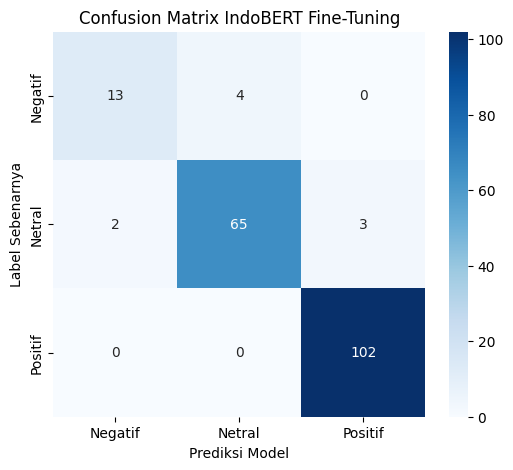


===== Laporan Klasifikasi =====
              precision    recall  f1-score   support

     negatif       0.87      0.76      0.81        17
      netral       0.94      0.93      0.94        70
     positif       0.97      1.00      0.99       102

    accuracy                           0.95       189
   macro avg       0.93      0.90      0.91       189
weighted avg       0.95      0.95      0.95       189



In [ ]:


import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 1. Muat model hasil fine-tuning
model_path = "/content/indobert_finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# 2. Baca dataset uji
test_df = pd.read_csv("/content/test_dataset.csv")

# 3. Tokenisasi data uji
test_encodings = tokenizer(
    test_df["Interpretasi singkat"].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)

# 4. Prediksi label oleh model
model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=1).numpy()

# 5. Mapping label angka ke teks
id2label = {0: "negatif", 1: "netral", 2: "positif"}
predicted_labels = [id2label[p] for p in predictions]

# 6. Gabungkan hasil ke DataFrame
test_df["predicted_label"] = predicted_labels

# 7. Tampilkan 10 hasil prediksi pertama
print("\n===== Contoh Hasil Prediksi =====")
print(test_df[["Interpretasi singkat", "label", "predicted_label"]].head(10))

# 8. Buat confusion matrix
cm = confusion_matrix(test_df["label"], test_df["predicted_label"], labels=["negatif", "netral", "positif"])

# 9. Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negatif", "Netral", "Positif"],
            yticklabels=["Negatif", "Netral", "Positif"])
plt.xlabel("Prediksi Model")
plt.ylabel("Label Sebenarnya")
plt.title("Confusion Matrix IndoBERT Fine-Tuning")
plt.show()

# 10. Laporan klasifikasi
print("\n===== Laporan Klasifikasi =====")
print(classification_report(test_df["label"], test_df["predicted_label"]))


==== Contoh Hasil Prediksi ====
                                Interpretasi singkat    label predicted_label
0  stimulus ekonomi pemerintah dinilai belum opti...   netral          netral
1  artikel promosi info tempo yang menyoroti kont...  positif         positif
2  purbaya mengkritik daerah yang menyimpan dana ...   netral          netral
3  nada negatif, menggambarkan pesimisme ekonomi ...  negatif         negatif
4  wamenkeu menjelaskan alasan pemangkasan transf...   netral          netral
5  informasi komprehensif tentang beberapa paket ...   netral          netral
6  nada positif, menunjukkan optimisme terhadap s...  positif         positif
7  optimisme bank indonesia terhadap peningkatan ...  positif         positif
8  nada negatif, pesimistis terhadap kinerja pert...   netral         negatif
9  artikel menyoroti peran lembaga sosial di ting...   netral          netral

==== Laporan Klasifikasi ====
              precision    recall  f1-score   support

     negatif       0.87 

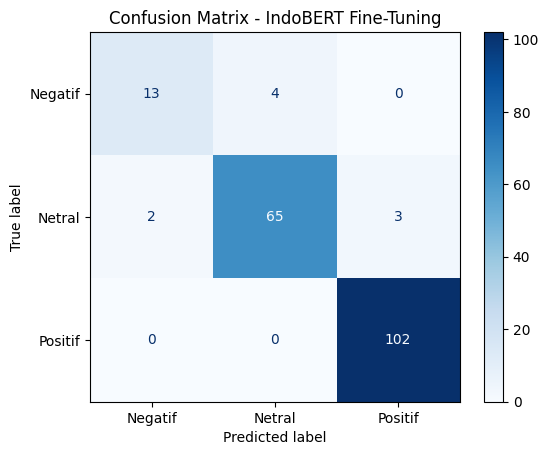

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Load model & tokenizer dari folder yang benar
model_path = "/content/indobert_finetuned"   # FOLDER MODEL YANG BENAR
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Load dataset uji
df_test = pd.read_csv("/content/test_dataset.csv")

# Tokenisasi teks
inputs = tokenizer(
    df_test["Interpretasi singkat"].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)

# Prediksi
with torch.no_grad():
    outputs = model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1).numpy()

# Mapping label angka → label teks
id2label = {0: "negatif", 1: "netral", 2: "positif"}
df_test["predicted_label"] = [id2label[p] for p in preds]

# Contoh hasil prediksi
print("==== Contoh Hasil Prediksi ====")
print(df_test[["Interpretasi singkat", "label", "predicted_label"]].head(10))

# Laporan klasifikasi
print("\n==== Laporan Klasifikasi ====")
print(classification_report(df_test["label"], df_test["predicted_label"], digits=2))

# Confusion matrix
cm = confusion_matrix(
    df_test["label"],
    df_test["predicted_label"],
    labels=["negatif", "netral", "positif"]
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negatif", "Netral", "Positif"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - IndoBERT Fine-Tuning")
plt.show()


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load dataset lengkap
df = pd.read_csv("/content/berita_prabowo_labeled.csv")

# Load model IndoBERT hasil fine-tuning
model_path = "/content/indobert_finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

# Tokenisasi teks seluruh dataset
inputs = tokenizer(
    df["Interpretasi singkat"].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="pt"
)

# Prediksi sentimen
with torch.no_grad():
    outputs = model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1).numpy()

# Mapping label numerik ke label teks
id2label = {0: "negatif", 1: "netral", 2: "positif"}
df["predicted_label"] = [id2label[p] for p in preds]

# Simpan dataset dengan hasil prediksi
df.to_csv("/content/berita_sentimen_full.csv", index=False)
print("Prediksi sentimen selesai dan disimpan.")


Prediksi sentimen selesai dan disimpan.


In [ ]:
df["Tanggal"] = pd.to_datetime(df["Tanggal"], errors="coerce")
df["Bulan"] = df["Tanggal"].dt.to_period("M").astype(str)

print(df[["Tanggal", "Bulan", "predicted_label"]].head())


     Tanggal    Bulan predicted_label
0 2024-10-26  2024-10         positif
1 2024-10-27  2024-10         positif
2 2024-11-05  2024-11         positif
3 2024-11-06  2024-11         positif
4 2024-11-10  2024-11         positif


In [ ]:
sentimen_bulanan = df.groupby(["Bulan", "predicted_label"]).size().unstack(fill_value=0)

print("===== Jumlah Sentimen Per Bulan =====")
print(sentimen_bulanan)


===== Jumlah Sentimen Per Bulan =====
predicted_label  negatif  netral  positif
Bulan                                    
2024-01                0       0        1
2024-02                0       3        1
2024-03                1       2        1
2024-04                0       0        1
2024-06                0       0        1
2024-07                0       1        1
2024-08                0       1        9
2024-09                0       3        7
2024-10                1       5       17
2024-11                1       3        9
2024-12                3       3        8
2025-01                1       5       17
2025-02                7       6       30
2025-03               11       9       11
2025-04                2      14       10
2025-05                7      23       45
2025-06                9      21       36
2025-07                6      31       30
2025-08               11      36       96
2025-09               19      56       71
2025-10               14     114      

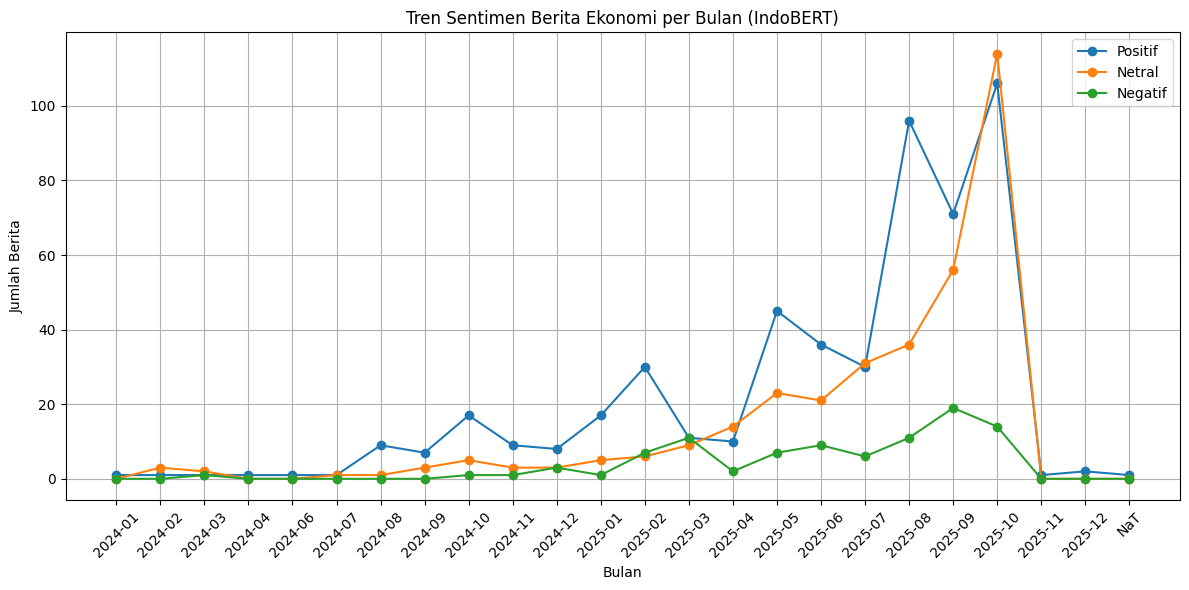

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sentimen_bulanan.index, sentimen_bulanan["positif"], marker="o")
plt.plot(sentimen_bulanan.index, sentimen_bulanan["netral"], marker="o")
plt.plot(sentimen_bulanan.index, sentimen_bulanan["negatif"], marker="o")

plt.title("Tren Sentimen Berita Ekonomi per Bulan (IndoBERT)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.legend(["Positif", "Netral", "Negatif"])
plt.grid(True)
plt.tight_layout()
plt.show()


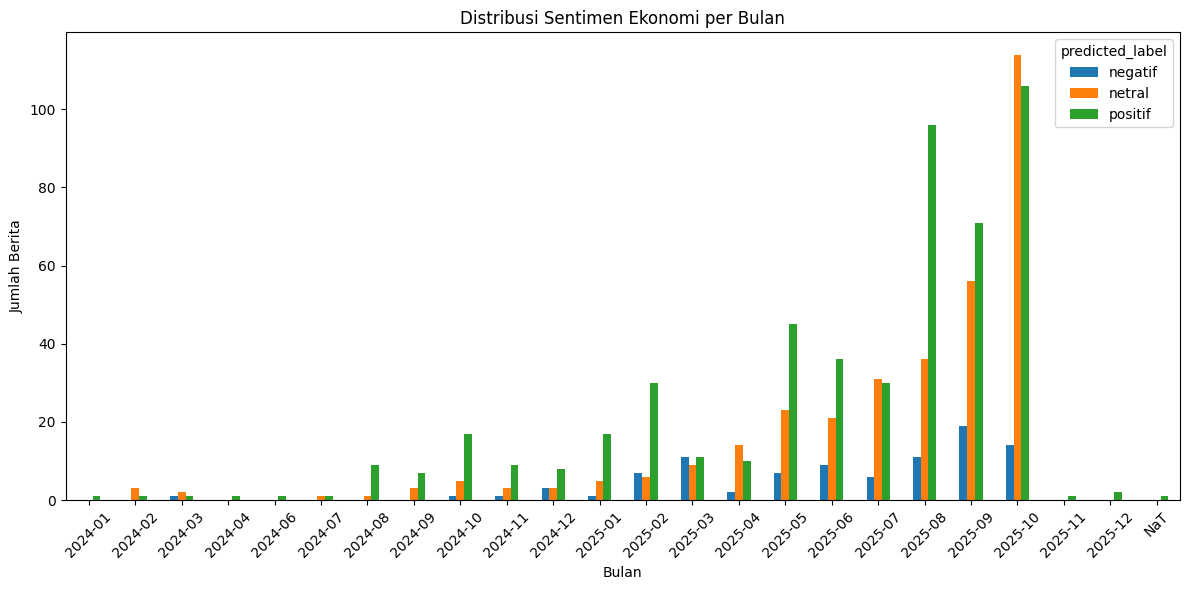

In [ ]:
sentimen_bulanan.plot(kind="bar", figsize=(12,6))

plt.title("Distribusi Sentimen Ekonomi per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
